# Assignment 4

Niko Fauter (1047241)

Henning Klatt (1079429)

### Directional Differenz Calculation

In [1]:
using Images, Plots, FileIO, ImageIO
function getOrientationChannels(img) 
        imgArray = channelview(float.(img))
        g_0=zeros(size(imgArray))
        g_45=zeros(size(imgArray))
        g_90=zeros(size(imgArray))     
        g_135=zeros(size(imgArray))            
        for i in eachindex(view(imgArray,1:size(imgArray,1),1:size(imgArray,2)))
            if i[2] == size(imgArray,2)
                g_0[i]=0
                g_45[i]=0
                if i[1] == size(imgArray,1)
                    g_90[i]=0   
                else
                    g_90[i]=imgArray[i]-imgArray[i[1]+1,i[2]]                          
                end
                
            else
                g_0[i]=imgArray[i]-imgArray[i[1],i[2]+1]
                if i[1]== size(imgArray,1)
                    g_45[i]=0
                else
                    
                    g_45[i]=imgArray[i]-imgArray[i[1]+1,i[2]+1]
                    g_90[i]=imgArray[i]-imgArray[i[1]+1,i[2]] 
                end
            end
            if i[2] == 1 || i[1]==size(imgArray,1)
                g_135[i]=0
            else
                g_135[i]=imgArray[i]-imgArray[i[1]+1,i[2]-1]
            end
        end   
        return g_0.^2,g_45.^2,g_90.^2,g_135.^2
end

getOrientationChannels (generic function with 1 method)

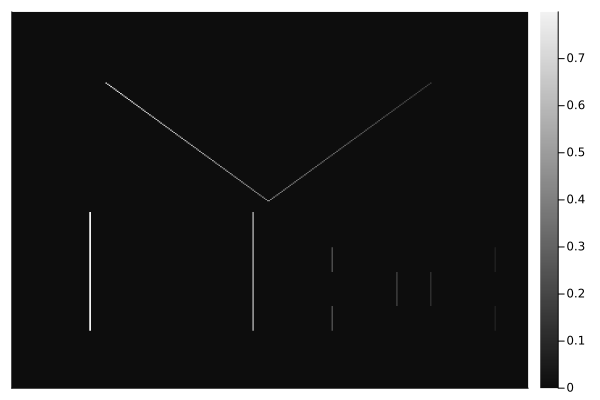

In [2]:
shapes=load("shapes1.png")
g_0,g_45,g_90,g_135 =getOrientationChannels(shapes);
heatmap(g_0,color=:grays,xticks=false,yticks=false)

### 

In [3]:
box=centered(ones(5,5))
c_0= imfilter(g_0,box)
c_45=imfilter(g_45,box)
c_90=imfilter(g_90,box)
c_135=imfilter(g_135,box);


In [4]:
function maxmin(c_0,c_45,c_90,c_135,max)
    c_maxmin=zeros(size(c_0))
    for i in eachindex(c_0)
        if max
            c_maxmin[i]=maximum([c_0[i], c_45[i], c_90[i], c_135[i]])
        else
            c_maxmin[i]=minimum([c_0[i], c_45[i], c_90[i], c_135[i]])
        end
    end
    return c_maxmin
end

maxmin (generic function with 1 method)

In [5]:
function normalize(c_0,c_45,c_90,c_135,avg)
    if avg
        sum=c_0 .+ c_45 .+ c_90 + c_135
        println("size(sum): ",size(sum))
        c_0_avg= c_0./sum
        c_45_avg=c_45./sum
        c_90_avg=c_90./sum
        c_135_avg=c_135./sum
        return c_0_avg,c_45_avg,c_90_avg, c_135_avg
    else
        max=maxmin(c_0,c_45,c_90,c_135,true)
        c_0_max= c_0./max
        c_45_max=c_45./max
        c_90_max=c_90./max
        c_135_max=c_135./max
        return c_0_max,c_45_max,c_90_max, c_135_max
    end
end


normalize (generic function with 1 method)

size(sum): (320, 320)


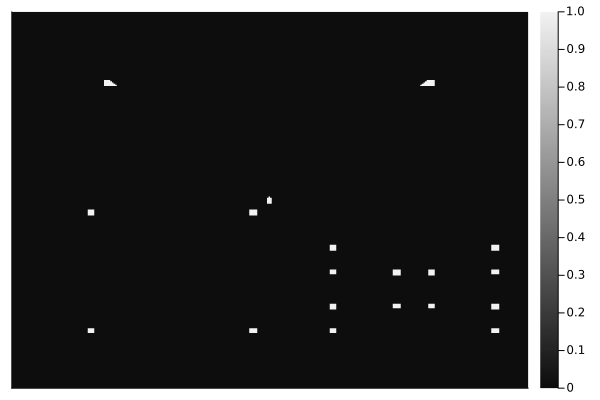

In [6]:
#normalize by average
c_0_avg,c_45_avg,c_90_avg, c_135_avg=normalize(c_0,c_45,c_90,c_135,true)
#finding the minimum
c_min=maxmin(c_0_avg,c_45_avg,c_90_avg, c_135_avg,false)
#thresholding
c_result=c_min.>0.01
heatmap(c_result,color=:grays,xticks=false,yticks=false)

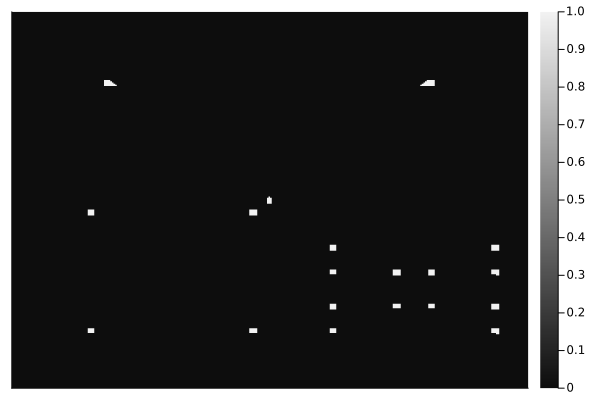

In [7]:
#normalize by maximum
c_0_max,c_45_max,c_90_max, c_135_max=normalize(c_0,c_45,c_90,c_135,false)
#finding the minimum
c_min=maxmin(c_0_max,c_45_max,c_90_max, c_135_max,false)
#thresholding
c_result=c_min.>0.001
heatmap(c_result,color=:grays,xticks=false,yticks=false)

### Colorcoded gradient direction visualisation

In [8]:
shapes=load("shapes1_noisy.png")
box=centered(ones(10,10)./100)
#shapes_filtered=imfilter(shapes,box)



10×10 OffsetArray(::Matrix{Float64}, -4:5, -4:5) with eltype Float64 with indices -4:5×-4:5:
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01

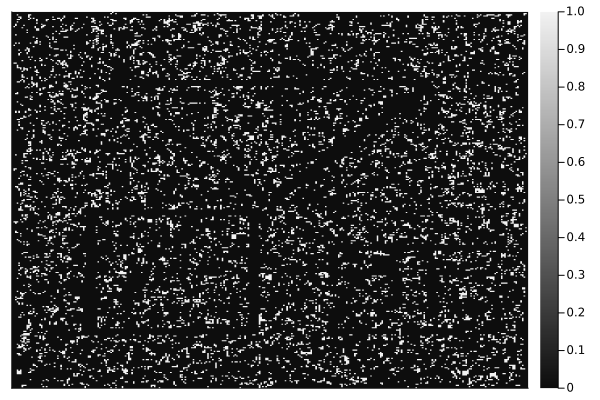

In [9]:
g_0,g_45,g_90,g_135 =getOrientationChannels(shapes)

box=centered(ones(5,5))
c_0= imfilter(g_0,box)
c_45=imfilter(g_45,box)
c_90=imfilter(g_90,box)
c_135=imfilter(g_135,box)
#c_0=c_0.^2
#c_45= c_45.^2
#c_90= c_90.^2
#c_135=c_135.^2
#normalize by average
c_0_avg,c_45_avg,c_90_avg, c_135_avg=normalize(c_0,c_45,c_90,c_135,false)
#finding the minimum
c_min=maxmin(c_0_avg,c_45_avg,c_90_avg, c_135_avg,false)
#thresholding
c_result=c_min.>0.8
heatmap(c_result,color=:grays,xticks=false,yticks=false)

Because of the noise, we find high directional differences everywhere, therfore, true corners can no longer be distingushed 
Solution: since the noise is random the polarity of directional differences should cancel out differences caused by noise (statisically over a lokal area), thus first locally averaging over the directional differences
(via boxfilter) and then squaring the result should do the trick. (Is this equivalent to first applying a boxfilter to the image, averaging it?)